In [3]:
import os
import os.path
import pandas as pd
import pylab as plt
from matplotlib_venn import venn2
import numpy as np
%matplotlib inline

In [4]:
clust_results_dir = "/Users/johnsolk/Documents/UCDavis/Whitehead/clust_results/by_species/Ensembl_March2019/"
clust_results = os.listdir(clust_results_dir)
clust_results

['Results_04_Mar_19_Folivaceous',
 '.DS_Store',
 'Results_04_Mar_19_Frathbuni',
 'Results_04_Mar_19_Fsimilis',
 'Results_04_Mar_19_Fnotatus',
 'Results_04_Mar_19_Fzebrinus',
 'Results_04_Mar_19_Lgoodei',
 'Results_04_Mar_19_Fparvapinis',
 'Results_04_Mar_19_Fsciadicus',
 'Results_04_Mar_19_FheteroclitusMDPL',
 'Results_04_Mar_19_Lparva',
 'Results_04_Mar_19_Fchrysotus',
 'Results_04_Mar_19_FheteroclitusMDPP',
 'Results_04_Mar_19_Axenica',
 'Results_04_Mar_19_Fcatanatus',
 'Results_04_Mar_19_Fdiaphanus',
 'Results_04_Mar_19_Fgrandis']

In [5]:
species_data = {}
for i in clust_results:
    if i != ".DS_Store":
        species = i.split("_")[-1]
        print(species)
        results_files = os.listdir(clust_results_dir+i)
        clusters_file = [x for x in results_files if x=="Clusters_Objects.tsv"][0]
        clusters = pd.read_csv(clust_results_dir + i + "/" + clusters_file,skiprows=0,sep="\t")
        clusters = clusters.iloc[1:]
        data_files = os.listdir(clust_results_dir + i + "/Processed_Data/")
        data_file = [x for x in data_files if x.endswith(".tsv")][0]
        data = pd.read_csv(clust_results_dir + i + "/Processed_Data/"+data_file,sep="\t",index_col=0)
        species_data[species] = [clusters,data]                       

Folivaceous
Frathbuni
Fsimilis
Fnotatus
Fzebrinus
Lgoodei
Fparvapinis
Fsciadicus
FheteroclitusMDPL
Lparva
Fchrysotus
FheteroclitusMDPP
Axenica
Fcatanatus
Fdiaphanus
Fgrandis


In [6]:
data.head()

,15_ppt,0.2_ppt,transfer
Genes,,,
ENSFHEP00000000003,-1.196918,1.250793,-0.053875
ENSFHEP00000000004,1.157539,0.124848,-1.282387
ENSFHEP00000000005,0.832399,0.573918,-1.406318
ENSFHEP00000000007,0.348049,1.013050,-1.361099
ENSFHEP00000000008,0.486407,0.906821,-1.393228


In [7]:
clusters.head()

,C0 (2318 genes),C1 (1896 genes),C2 (1846 genes),C3 (1202 genes),C4 (1219 genes),C5 (1501 genes),C6 (2308 genes),C7 (1822 genes),C8 (1175 genes),C9 (1154 genes),C10 (1687 genes),C11 (1973 genes)
1,ENSFHEP00000000021,ENSFHEP00000000013,ENSFHEP00000000009,ENSFHEP00000000043,ENSFHEP00000000010,ENSFHEP00000000014,ENSFHEP00000000057,ENSFHEP00000000003,ENSFHEP00000000011,ENSFHEP00000000076,ENSFHEP00000000005,ENSFHEP00000000004
2,ENSFHEP00000000025,ENSFHEP00000000015,ENSFHEP00000000018.1,ENSFHEP00000000046,ENSFHEP00000000054,ENSFHEP00000000026.1,ENSFHEP00000000063,ENSFHEP00000000034,ENSFHEP00000000037,ENSFHEP00000000120.1,ENSFHEP00000000008,ENSFHEP00000000039
3,ENSFHEP00000000029,ENSFHEP00000000017.1,ENSFHEP00000000023.1,ENSFHEP00000000051,ENSFHEP00000000071,ENSFHEP00000000110,ENSFHEP00000000078,ENSFHEP00000000056,ENSFHEP00000000088,ENSFHEP00000000132,ENSFHEP00000000038,ENSFHEP00000000049
4,ENSFHEP00000000035,ENSFHEP00000000020.1,ENSFHEP00000000053,ENSFHEP00000000166,ENSFHEP00000000138,ENSFHEP00000000111,ENSFHEP00000000101,ENSFHEP00000000067,ENSFHEP00000000107,ENSFHEP00000000198,ENSFHEP00000000045,ENSFHEP00000000050
5,ENSFHEP00000000052,ENSFHEP00000000024.1,ENSFHEP00000000055,ENSFHEP00000000171.1,ENSFHEP00000000153.1,ENSFHEP00000000134,ENSFHEP00000000115,ENSFHEP00000000114,ENSFHEP00000000148,ENSFHEP00000000223,ENSFHEP00000000080,ENSFHEP00000000060


# how to connect clusters in each species?

In [8]:
#BW,FW,TR:
#down,up,up
#F_catanatus: C4
#F_rathbuni: C2
#L_goodei: C4
#F_sciadicus: not present
#F_olivaceus: C10
#F_notatus: C4

#Now, go find the genes in these clusters, and plot them, put them all in a dataframe with categories 

In [9]:
cluster_genes = {}
downzeroup_cluster = {"Fcatanatus": "C4",
              "Frathbuni": "C2",
              "Lgoodei": "C4",
              "Folivaceous": "C10",
              "Fnotatus": "C4"}
for species in downzeroup_cluster:
    print(species)
    cluster = species_data[species][0]
    cluster_number = cluster.columns
    for i in cluster_number:
        number = i.split(" ")[0]
        if number == downzeroup_cluster[species]:
            col = cluster[pd.notnull(cluster[i])]
            cluster_genes[species] = col[[i]]

Fcatanatus
Frathbuni
Lgoodei
Folivaceous
Fnotatus


In [10]:
a = set(cluster_genes['Fcatanatus'].iloc[:,0].tolist())
len(a)

281

In [11]:
b = set(cluster_genes['Frathbuni'].iloc[:,0].tolist())
len(b)

1320

In [12]:
gene_list_common = list(a | b)
print(len(gene_list_common))

1590


In [13]:
gene_list_common.extend(gene_list_common)

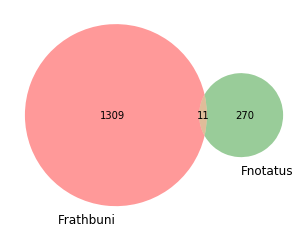

In [14]:
venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Frathbuni',species))
plt.show()

281


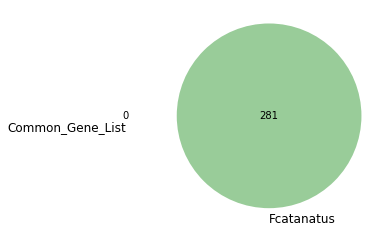

1590


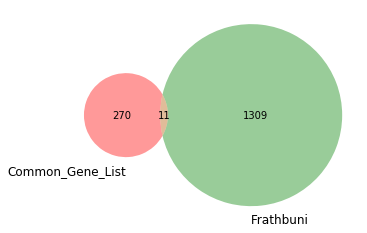

1980


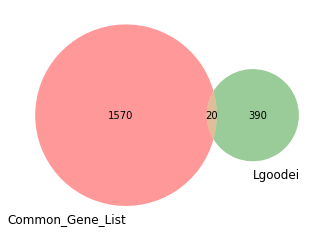

2094


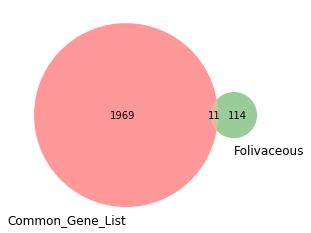

2378


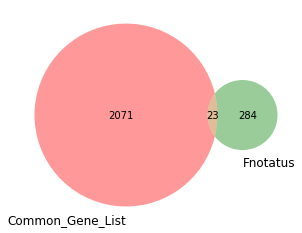

In [15]:
gene_list_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = set(gene_list_common)
    gene_list_common = list(a | b)
    print(len(gene_list_common))
    gene_list_common.extend(gene_list_common)
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show() 

In [16]:
print(len(gene_list_common))
print(len(set(gene_list_common)))
gene_list_common_all = set(gene_list_common)

4756
2378


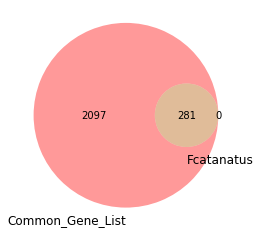

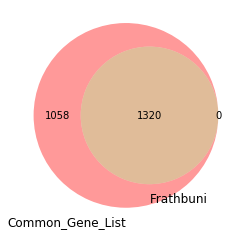

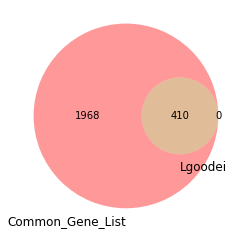

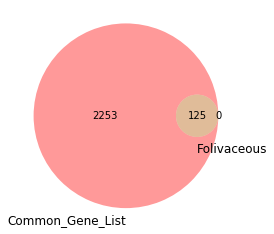

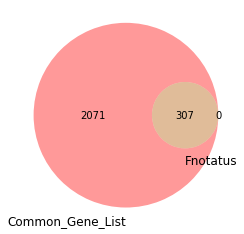

In [17]:
each_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = gene_list_common_all
    each_common.append(list(b.intersection(a)))
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show()

In [18]:
each_common

[['ENSFHEP00000001643',
  'ENSFHEP00000013569.1',
  'ENSFHEP00000034463',
  'ENSFHEP00000003695',
  'ENSFHEP00000017858.1',
  'ENSFHEP00000029203',
  'ENSFHEP00000010024.1',
  'ENSFHEP00000019963',
  'ENSFHEP00000032694.1',
  'ENSFHEP00000015008.1',
  'ENSFHEP00000013212',
  'ENSFHEP00000010082',
  'ENSFHEP00000017786.1',
  'ENSFHEP00000026267.1',
  'ENSFHEP00000035159',
  'ENSFHEP00000008354',
  'ENSFHEP00000010079.1',
  'ENSFHEP00000016251',
  'ENSFHEP00000023557',
  'ENSFHEP00000015013',
  'ENSFHEP00000020419.1',
  'ENSFHEP00000001873',
  'ENSFHEP00000014965.1',
  'ENSFHEP00000015715.1',
  'ENSFHEP00000018099.1',
  'ENSFHEP00000011872',
  'ENSFHEP00000018139.1',
  'ENSFHEP00000009653',
  'ENSFHEP00000008687',
  'ENSFHEP00000017811',
  'ENSFHEP00000019847',
  'ENSFHEP00000020611',
  'ENSFHEP00000025836',
  'ENSFHEP00000010340',
  'ENSFHEP00000011030',
  'ENSFHEP00000003803.1',
  'ENSFHEP00000006074',
  'ENSFHEP00000030865',
  'ENSFHEP00000026129',
  'ENSFHEP00000034660',
  'ENSFHEP00

In [19]:
set.intersection(*map(set,each_common))

set()

### Therefore, the down-zero-up pattern is not conserved across all freshwater species. What about in clade?

### Clade 1

In [20]:
cluster_genes = {}
downzeroup_cluster_clade1 = {"Fcatanatus": "C4",
              "Frathbuni": "C2"}
downzeroup_cluster_clade3 = {"Folivaceous": "C10",
              "Fnotatus": "C4"}
for species in downzeroup_cluster_clade1:
    print(species)
    cluster = species_data[species][0]
    cluster_number = cluster.columns
    for i in cluster_number:
        number = i.split(" ")[0]
        if number == downzeroup_cluster[species]:
            col = cluster[pd.notnull(cluster[i])]
            cluster_genes[species] = col[[i]]

Fcatanatus
Frathbuni


281


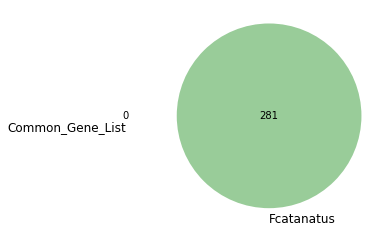

1590


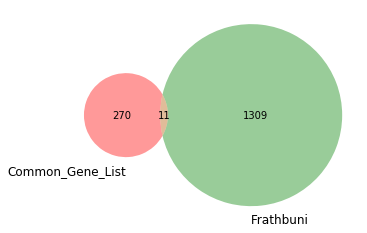

In [21]:
gene_list_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = set(gene_list_common)
    gene_list_common = list(a | b)
    print(len(gene_list_common))
    gene_list_common.extend(gene_list_common)
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show() 

In [22]:
print(len(gene_list_common))
print(len(set(gene_list_common)))
gene_list_common_all = set(gene_list_common)

3180
1590


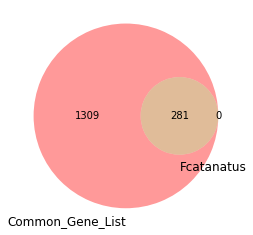

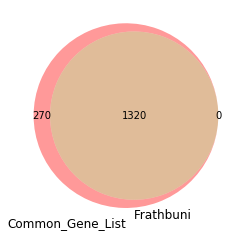

In [23]:
each_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = gene_list_common_all
    each_common.append(list(b.intersection(a)))
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show()

In [24]:
a = set.intersection(*map(set,each_common))

In [25]:
len(a)

11

In [26]:
b = pd.DataFrame(list(a),columns = ['ensembl_peptide_id'])

In [27]:
b.head()

,ensembl_peptide_id
0,ENSFHEP00000001968
1,ENSFHEP00000016050
2,ENSFHEP00000033165.1
3,ENSFHEP00000015869
4,ENSFHEP00000009010.1


In [28]:
b.shape

(11, 1)

In [29]:
c = pd.read_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/Ensembl_annotations.csv",index_col=0)

In [30]:
c.head()

,ensembl_peptide_id,ensembl_transcript_id,ensembl_gene_id,gene_biotype,external_gene_name,go_id,description,entrezgene
1,ENSFHEP00000000002,ENSFHET00000000007,ENSFHEG00000000007,protein_coding,ND1,GO:0016020,NADH dehydrogenase subunit 1 [Source:NCBI gene...,7668434.0
2,ENSFHEP00000000002,ENSFHET00000000007,ENSFHEG00000000007,protein_coding,ND1,GO:0016021,NADH dehydrogenase subunit 1 [Source:NCBI gene...,7668434.0
3,ENSFHEP00000000002,ENSFHET00000000007,ENSFHEG00000000007,protein_coding,ND1,GO:0055114,NADH dehydrogenase subunit 1 [Source:NCBI gene...,7668434.0
4,ENSFHEP00000000002,ENSFHET00000000007,ENSFHEG00000000007,protein_coding,ND1,GO:0005739,NADH dehydrogenase subunit 1 [Source:NCBI gene...,7668434.0
5,ENSFHEP00000000002,ENSFHET00000000007,ENSFHEG00000000007,protein_coding,ND1,GO:0016491,NADH dehydrogenase subunit 1 [Source:NCBI gene...,7668434.0


In [31]:
d = pd.merge(b,c,on="ensembl_peptide_id",how="left")

In [32]:
d.shape

(52, 8)

In [33]:
d

,ensembl_peptide_id,ensembl_transcript_id,ensembl_gene_id,gene_biotype,external_gene_name,go_id,description,entrezgene
0,ENSFHEP00000001968,ENSFHET00000012997,ENSFHEG00000002756,protein_coding,srrt,NaN,"serrate, RNA effector molecule [Source:NCBI ge...",105929344.0
1,ENSFHEP00000016050,ENSFHET00000024373,ENSFHEG00000017717,protein_coding,appb,NaN,amyloid beta A4 protein [Source:NCBI gene;Acc:...,105934899.0
2,ENSFHEP00000033165.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ENSFHEP00000015869,ENSFHET00000033363,ENSFHEG00000017557,protein_coding,sgk494b,NaN,putative serine/threonine-protein kinase F31E3...,105919819.0
4,ENSFHEP00000009010.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ENSFHEP00000026129,ENSFHET00000003484,ENSFHEG00000008759,protein_coding,acvr1l,GO:0009952,activin receptor type-1-like [Source:NCBI gene...,105939051.0
6,ENSFHEP00000026129,ENSFHET00000003484,ENSFHEG00000008759,protein_coding,acvr1l,GO:0048332,activin receptor type-1-like [Source:NCBI gene...,105939051.0
7,ENSFHEP00000026129,ENSFHET00000003484,ENSFHEG00000008759,protein_coding,acvr1l,GO:0005737,activin receptor type-1-like [Source:NCBI gene...,105939051.0
8,ENSFHEP00000026129,ENSFHET00000003484,ENSFHEG00000008759,protein_coding,acvr1l,GO:0007420,activin receptor type-1-like [Source:NCBI gene...,105939051.0
9,ENSFHEP00000026129,ENSFHET00000003484,ENSFHEG00000008759,protein_coding,acvr1l,GO:0001947,activin receptor type-1-like [Source:NCBI gene...,105939051.0


### Clade 3

In [36]:
cluster_genes = {}
downzeroup_cluster_clade1 = {"Fcatanatus": "C4",
              "Frathbuni": "C2"}
downzeroup_cluster_clade3 = {"Folivaceous": "C10",
              "Fnotatus": "C4"}
for species in downzeroup_cluster_clade3:
    print(species)
    cluster = species_data[species][0]
    cluster_number = cluster.columns
    for i in cluster_number:
        number = i.split(" ")[0]
        if number == downzeroup_cluster[species]:
            col = cluster[pd.notnull(cluster[i])]
            cluster_genes[species] = col[[i]]

Folivaceous
Fnotatus


125


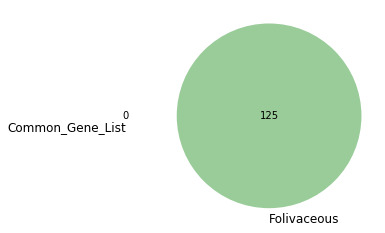

431


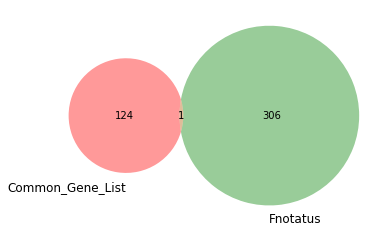

In [37]:
gene_list_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = set(gene_list_common)
    gene_list_common = list(a | b)
    print(len(gene_list_common))
    gene_list_common.extend(gene_list_common)
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show() 

In [38]:
print(len(gene_list_common))
print(len(set(gene_list_common)))
gene_list_common_all = set(gene_list_common)

862
431


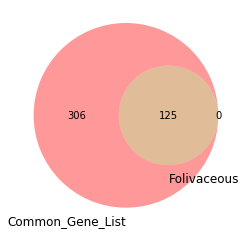

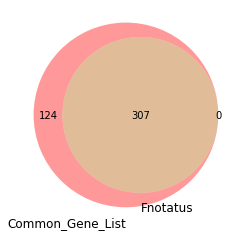

In [39]:
each_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = gene_list_common_all
    each_common.append(list(b.intersection(a)))
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show()

In [40]:
a = set.intersection(*map(set,each_common))

In [41]:
len(a)

1

In [42]:
b = pd.DataFrame(list(a),columns = ['ensembl_peptide_id'])

In [43]:
b.head()

,ensembl_peptide_id
0,ENSFHEP00000005982


In [44]:
b.shape

(1, 1)

In [45]:
c = pd.read_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/Ensembl_annotations.csv",index_col=0)

In [46]:
d = pd.merge(b,c,on="ensembl_peptide_id",how="left")

In [47]:
d.shape

(1, 8)

In [48]:
d

,ensembl_peptide_id,ensembl_transcript_id,ensembl_gene_id,gene_biotype,external_gene_name,go_id,description,entrezgene
0,ENSFHEP00000005982,ENSFHET00000006279,ENSFHEG00000006989,protein_coding,rhd,NaN,ammonium transporter Rh type A [Source:NCBI ge...,105925973.0
